# <a id='0'>1. Image Manipulation using OpenCV </a>

### Import Libraries

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2  # Package from OpenCV

%matplotlib inline

Let's take RGB Color model, any color is represented as a combination of Red, Green and Blue.

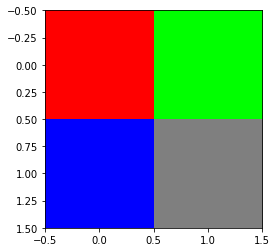

In [4]:
color_1 = [255, 0, 0]      # red
color_2 = [0, 255, 0]      # green
color_3 = [0, 0, 255]      # blue
color_4 = [127, 127, 127]  # grey

plt.imshow(np.array([
    [color_1, color_2],
    [color_3, color_4],
]))

Now with the help of numpy, I can represent images as simple arrays of pixels:

Each value in the BGR 3-tuple has a range of [0, 255]. How many color possibilities are there for each pixel in an RGB image in OpenCV? That’s easy: 256 * 256 * 256 = 16777216.

(2, 2, 3)


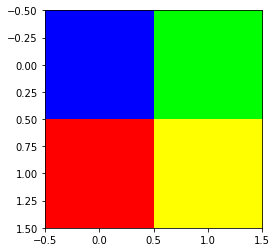

In [5]:
colors = [
    [
        [0, 0, 255], # blue
        [0, 255, 0] # green
    ],
    [
        [255, 0, 0], # red
        [255, 255, 0] # yellow
    ]
]

print(np.array(colors).shape)

plt.imshow(colors)

Numpy is great at managing matrices and multi-dimensional arrays (cubes, tensors, etc).

(2, 2, 3)


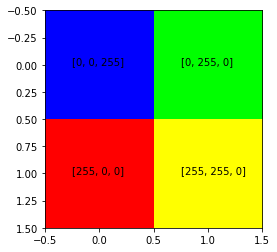

In [6]:
# Let's plot array of colours in RGB Color model 

colors = [
    [
        [0, 0, 255], # blue
        [0, 255, 0]  # green
    ],
    [
        [255, 0, 0],  # red
        [255, 255, 0] # yellow
    ]
]

print(np.array(colors).shape)

plt.imshow(colors)
start_row = 0
for row in colors:
    start_col = -0.25
    for color in row:
        plt.text(start_col, start_row, str(color))
        start_col += 1
    start_row += 1

## Play with OpenCV

OpenCV (Open Source Computer Vision Library) is a library that has many features, tools, algorithms and utilities to manage images and image related resources (like cameras).

In [7]:
# read image
bear_image = cv2.imread("./Downloads/PolarBeariStock.jpg")

In [8]:
type(bear_image)

numpy.ndarray

In [9]:
bear_image.shape

(524, 931, 3)

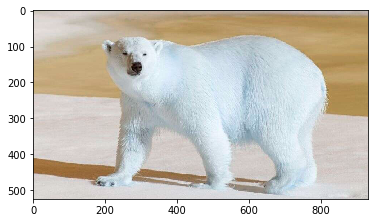

In [10]:
plt.imshow(bear_image)

### Using RGB pixel format

OpenCV uses by default the BGR pixel format (or color mode). The most common standard for computers and libraries (like matplotlib) is RGB. It's simple to convert from BGR to RGB:

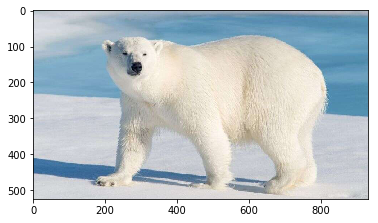

In [11]:
# parse BRG to RGB
bear_image = cv2.cvtColor(bear_image, cv2.COLOR_BGR2RGB)

# show image
plt.imshow(bear_image)

We can use a similar approach to transform our image to gray scale:

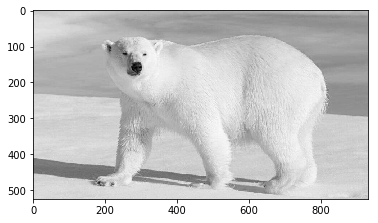

In [12]:
# parse image to grayscale
gray = cv2.cvtColor(bear_image, cv2.COLOR_BGR2GRAY)

# show image
plt.imshow(gray, cmap='gray')

### Resizing the image 

Note the resizing will deform the image a little bit. It is important to analyze this effect during the exploratory phase, as it can have a negative effect on the results of your model. Flowers and animals might be ok with a little stretching or squeezing, but facial features may not.

In [13]:
WIDTH = 300
HEIGHT = 300

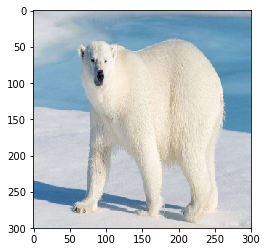

In [14]:
# resize, ignoring aspect ratio
resized = cv2.resize(bear_image, (WIDTH, HEIGHT))

# show image
plt.imshow(resized)

### Rescaling images

If you imagine portait images versus landscape images you’ll know that there are a lot of things that can get messed up by doing a slopping resize. Rescaling is assuming that you’re locking down the aspect ratio to prevent distortion in the image. In this case, we’ll scale down the image to the shortest side that matches with the model’s input size.

1.7767175572519085


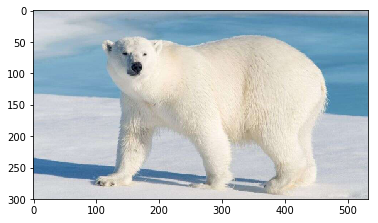

In [15]:
aspect = bear_image.shape[1] / float(bear_image.shape[0])
print(aspect)

if(aspect > 1):
    # landscape orientation - wide image
    res = int(aspect * HEIGHT)
    scaled = cv2.resize(bear_image, (res, HEIGHT))
if(aspect < 1):
    # portrait orientation - tall image
    res = int(WIDTH / aspect)
    scaled = cv2.resize(bear_image, (WIDTH, res))
if(aspect == 1):
    scaled = cv2.resize(bear_image, (WIDTH, HEIGHT))

# show image
plt.imshow(scaled)

### Cropping an image

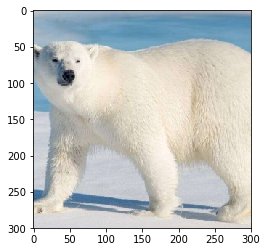

In [16]:
def crop_center (img, cropx, cropy):
    y,x,c = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    return img[starty:starty+cropy, startx:startx+cropx]
    # yes, the function above should match resize and take a tuple...

# Scaled image
cropped = crop_center(scaled, WIDTH, WIDTH)

# show image
plt.imshow(cropped, cmap='gray')

# <a id='0'>2. Camera Processing or Manipulation on Face Detection </a>

### Import necessary libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

Now we can define a `CAMERA` variable and start getting frames within a `while` loop as follows:

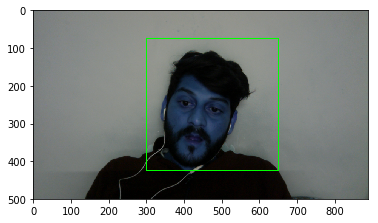

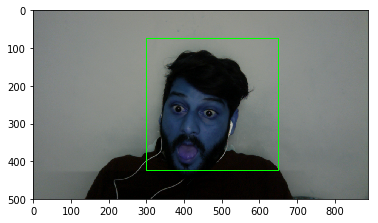

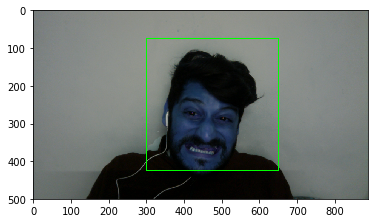

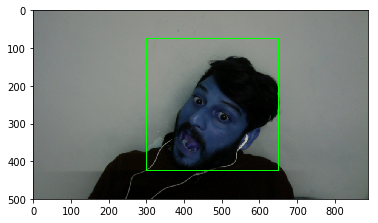

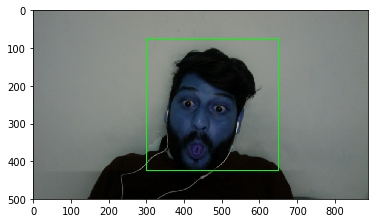

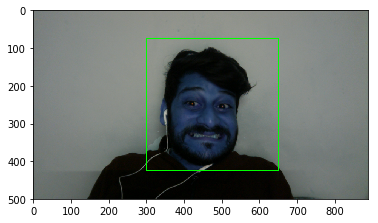

In [3]:
# get the reference to the webcam
CAMERA = cv2.VideoCapture(0)
HEIGHT = 500
RAW_FRAMES = []

while(True):
    # read a new frame
    _, frame = CAMERA.read()
    
    # flip the frame
    frame = cv2.flip(frame, 1)

    # rescaling camera output
    aspect = frame.shape[1] / float(frame.shape[0])
    res = int(aspect * HEIGHT) # landscape orientation - wide image
    frame = cv2.resize(frame, (res, HEIGHT))

    # add rectangle
    cv2.rectangle(frame, (300, 75), (650, 425), (0, 255, 0), 2)

    # show the frame
    cv2.imshow("Capturing frames", frame)

    key = cv2.waitKey(1)

    # quit camera if 'q' key is pressed
    if key & 0xFF == ord("q"):
        break
    elif key & 0xFF == ord("s"):
        # save the frame
        RAW_FRAMES.append(frame)
        
        # preview the frame
        plt.imshow(frame)
        plt.show()

CAMERA.release()
cv2.destroyAllWindows()

That's so horrible ! hahahah , At this point we have a lot of pictures, we now need to crop them to work only with our green _ROI_.

First take a look at raw frames:

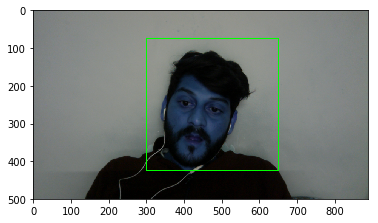

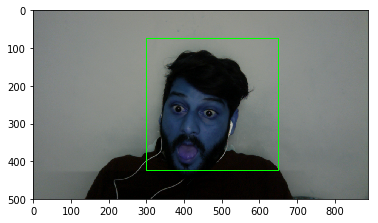

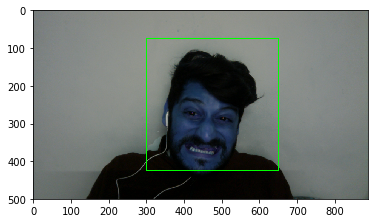

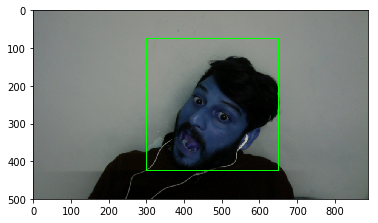

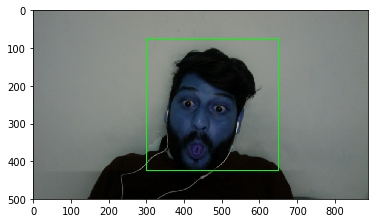

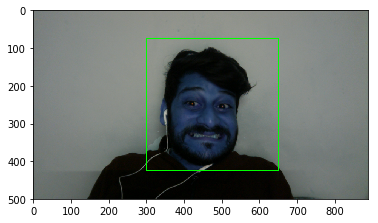

In [4]:
# show raw frames
for frame in RAW_FRAMES:
    plt.imshow(frame)
    plt.show()

We need to crop the green area (_ROI_) and parse to RGB format.

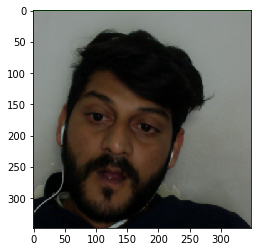

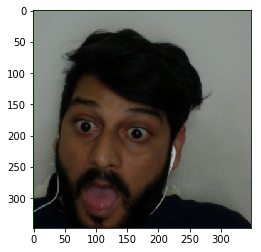

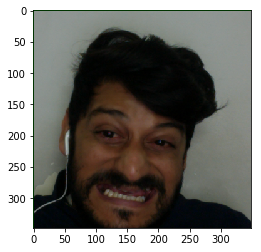

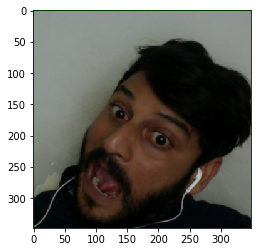

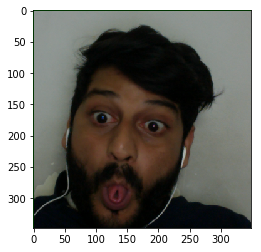

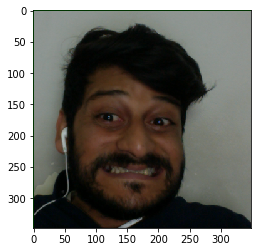

In [5]:
IMAGES = []

for frame in RAW_FRAMES:
    # get ROI
    roi = frame[75+1:425-1, 300+1:650-1]
    
    # parse BRG to RGB
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)

    IMAGES.append(roi)
    
    plt.imshow(roi)
    plt.show()

In [6]:
IMAGES[0].shape

(348, 348, 3)

We have just created our images dataset 🎉